In [209]:
#build a csv dataset 
import numpy as np
import pandas as pd
from io import StringIO
import sys
#数据不要打空格，IO流会读入空格
csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,
'''
df = pd.read_csv(StringIO(csv_data))



In [210]:
#using isnull() function to check NaN value 
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [211]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [212]:
df.dropna(axis = 0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [213]:
df.dropna(axis = 1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [214]:
df.dropna(how = 'all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [215]:
df.dropna(thresh = 4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [216]:
df.dropna(subset = ['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [217]:
#mean imputation
#axis = 0,表示列向，采用每一列的平均值填补空值

from sklearn.preprocessing import Imputer
imr = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0 )
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [218]:
#create categorical dataset 
import pandas as pd
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1']
])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [219]:
#converting categorical string values into integers
size_mapping = {
    'XL': 3,
    'L' : 2,
    'M' : 1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [220]:
#reverse mapping 
#inv_size_mapping = {
 #   v : k for k ,v in size_mapping.items()
#}
#df['size'] = df['size'].map(inv_size_mapping)
#df

In [221]:
import numpy as n
class_mapping = {label : idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [222]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [223]:
inv_class_mapping = {v : k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [224]:
#直接采用sklearn库中的LabelEncoder进行编码
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0], dtype=int64)

In [225]:
class_le.inverse_transform(y)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['class1', 'class2', 'class1'], dtype=object)

In [228]:
#one-hot 编码
pd.get_dummies(df[['size','color','price']])


,size,price,color_blue,color_green,color_red
0,1,10.1,0,1,0
1,2,13.5,0,0,1
2,3,15.3,1,0,0


In [229]:
#为避免共线性问题，降低变量间的相关性，删除one-hot数组中特征值的第一列
pd.get_dummies(df[['size','color','price']],drop_first = True)

,size,price,color_green,color_red
0,1,10.1,1,0
1,2,13.5,0,1
2,3,15.3,0,0


In [233]:
# read wine dataset
df_wine = pd.read_csv("G:\Machine Learning\python machine learning\python machine learning code\code\ch04\wine.data")
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [240]:
#seperate train and test data
from sklearn.model_selection import train_test_split
X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = \
                train_test_split(X, 
                                 y, 
                                 test_size = 0.3, 
                                 random_state = 0, 
                                 stratify = y)
    

In [244]:
#sklearn normalization
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [253]:
#sklearn standardization
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [254]:
# sklearn实现L1
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty = 'l1', C = 1.0)
lr.fit(X_train_std,y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))

Training accuracy: 1.0


In [255]:
print('Test accuracy:', lr.score(X_test_std, y_test))

Test accuracy: 0.9814814814814815


In [256]:
lr.coef_

array([[ 1.05143699,  0.30352633,  0.17389314, -0.64353847,  0.        ,
         0.        ,  1.16901427,  0.        ,  0.        ,  0.        ,
         0.        ,  0.69904716,  3.13098196],
       [-1.08456136, -0.57753167, -0.45710927,  0.08589221, -0.13624883,
         0.05387065,  0.58016085,  0.        ,  0.13364585, -1.98671663,
         0.91326305,  0.        , -2.9897839 ],
       [ 0.16324718,  0.11486212,  0.34221924,  0.        ,  0.        ,
         0.        , -2.55305744,  0.        ,  0.        ,  1.57856911,
        -0.89965471, -0.40219974,  0.        ]])

In [326]:
#SBS select features
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
class SBS():
    def __init__(self, 
                 estimator, #评估器 比如LR，KNN
                 k_features, #想要的特征个数
                 scoring = accuracy_score,#对模型的预测评分
                 test_size=0.25, 
                 random_state=1):
        
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        #seperete train data and test data
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                            test_size = self.test_size, 
                                                            random_state = self.random_state)
        # dimension 
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_] #特征子集
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        
        
        while dim > self.k_features:
            scores = [] #分数
            subsets = [] #子集
            
            for p in combinations(self.indices_, r = dim - 1):
                
                score = self._calc_score(X_train,
                                         y_train,
                                         X_test,
                                         y_test,
                                         p)
                
               # print(p, score) 
                
                scores.append(score)
                subsets.append(p)
            
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    
    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score


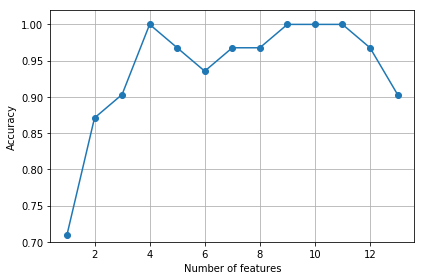

In [327]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()

[0.10910419 0.02518329 0.01165578 0.03239954 0.02726829 0.05035967
 0.16682242 0.01758669 0.02479922 0.14017842 0.05955377 0.1215238
 0.21356491]
 1) Proline                        0.213565
 2) Flavanoids                     0.166822
 3) Color intensity                0.140178
 4) OD280/OD315 of diluted wines   0.121524
 5) Alcohol                        0.109104
 6) Hue                            0.059554
 7) Total phenols                  0.050360
 8) Alcalinity of ash              0.032400
 9) Magnesium                      0.027268
10) Malic acid                     0.025183
11) Proanthocyanins                0.024799
12) Nonflavanoid phenols           0.017587
13) Ash                            0.011656


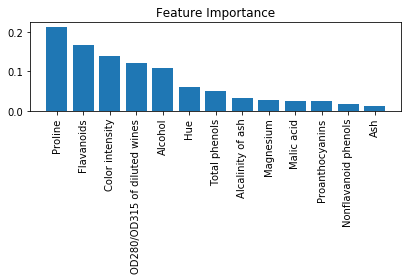

In [330]:
#随机森林选择特征值
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)

forest.fit(X_train, y_train)
#
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()






In [332]:
#SelectFromModel
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold = 0.1, prefit = True)
X_selected = sfm.transform(X_train)
print('Number of samples that meet this criterion:',X_selected.shape[0]

Number of samples that meet this criterion: 123


In [338]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Proline                        0.213565
 2) Flavanoids                     0.166822
 3) Color intensity                0.140178
 4) OD280/OD315 of diluted wines   0.121524
 5) Alcohol                        0.109104
